In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import (word_tokenize, MWETokenizer)

In [2]:
dataset = pd.read_csv("C:/1. My Laptop/5. Study/Python/Data Analyst Jobs Dataset/Dataset_(Project) Data_Analysis_Job_Market.csv")

In [31]:
df = dataset.copy()
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

### Analysis Purposes
1. Consumers of this report: Job Seekers in Data Analytics field in the USA.
2. Questions to be answered.
+ Salary Benchmark: What is the Average Salary distribution of Data Analytics jobs?
+ Technical Skills: What are the most common technical skillsets needed for Data Analytics Jobs?
+ Job Location: Where are Data Analytics jobs based in?
+ Attractive Sectors: What are the Sectors that have high pay? (definition of 'high pay': salary offer is above average) and what are the Sectors of 5/5 rated companies?

### Findings
+ Salary Benchmark: The most common average pay of Data Analytics (DA) jobs falls into the range of $60,000 - $80,000.
+ Technical Skills: The three most popular programming languagues required for DA jobs are SQL, Python and R respectively. The three most popular data analysis tools are Excel, Tableau and Power Bi in the mentioned order.   
+ Job Location: California is the biggest hub for DA jobs, with almost double the amouth of jobs in the second location - Texas, and New York stands in the third place.
+ Attractive Sectors: Information Technology (1st) and Business Services (2nd) have the highest number of above average pay jobs, and also have the most number of 5/5 ranked companies.

Data Limitation: We are looking at a sample of 2253 job dataset with 1 does not have Salary value and 353 jobs do not have Sector values



### Data Cleaning

In [33]:
#To remove -1 values (unavailable data) in Salary Esitmate and Sector columns. 1 job does not have Salary value and 353 jobs do not have Sector values
df[['Salary Estimate', 'Sector']] = df[['Salary Estimate', 'Sector']].replace('-1', None)

In [34]:
#To map each job rows into seniority categories
df['Seniority'] = df['Job Title'].str.lower()

df.loc[df['Seniority'].str.contains('senior|sr|manager|lead|principal|iii'), 'Seniority'] = 'Senior level'
df.loc[df['Seniority'].str.contains('junior|jr.|analyst i|entry'), 'Seniority'] = 'Junior level' 
df.loc[(~df['Seniority'].str.contains('Senior level|Junior level')), 'Seniority'] = 'Mid level'

In [35]:
# To get the states of the job location
states = {'CA':'California',
       'TX':'Texas',
       'NY':'New York',
       'IL':'Illinois',
       'PA':'Pennsylvania',
       'AZ':'Arizona',
       'CO':'Colorado',
       'NC':'North Carolina',
       'NJ':'New Jersey',
       'WA':'Washington',
       'VA':'Virginia',
       'OH':'Ohio',
       'UT':'Utah',
       'FL':'Florida',
       'IN':'Indiana',
       'DE':'Delaware',
       'GA':'Georgia',
       'KS':'Kansas',
       'SC':'South Carolina'}
df['State_Acronym'] = df['Location'].str[-2:]
df['State'] = df['State_Acronym'].map(states)

In [36]:
# To get the min and max salary of each job post 
df['Salary Estimate'] = df['Salary Estimate'].astype(str)
df['Min_Salary'] = df['Salary Estimate'].str.extract('(\d{2})', expand=False) + "000"
df['Max_Salary'] = df['Salary Estimate'].str.extract('[\D]*[\d]+[\D]+([\d]+)', expand=False) + "000"


In [37]:
programming_skill = ['python', 'r', 'sql', 'vba','javascript', 'java', 'objective_c', 'c_#' , 'c/c++', 'matlab', 'scala', 'julia']
data_tool = ['tableau', 'power_bi', 'excel', 'jupyter', 'spark', 'knime', 'rapidminer', 'qlikview', 'spunk', 'talend']

In [38]:
## To get the skill keywords out of the job description values.

# tokenize the job description into list of words
tokenizer = MWETokenizer([('power','bi'), ('c','#'), ('objective', 'c'), ('visual', 'basic')])
df['Job_Description_List'] = df['Job Description'].str.lower().apply(lambda x : tokenizer.tokenize(word_tokenize(x)))

# remove key word duplicate of each row
df['Job_Description_List'] = df['Job_Description_List'].apply(lambda x: list(set(x)))\
    .apply(lambda x: ' '.join(x))

jd = ' '.join(df['Job_Description_List'].to_list())
list_jd = tokenizer.tokenize(word_tokenize(jd))\

# map similar keywords as one
for i in range(len(list_jd)):
    if list_jd[i] == 'powerbi':
        list_jd[i] = 'power_bi'

    if list_jd[i] == 'visual basic':
        list_jd[i] = 'vba'

# to generate an out put of keywords and its number of appearances
def skill_filter(list_jd, skill_list):
    out_dictionary = {}

    for i in skill_list:
        a = list_jd.count(i)
        out_dictionary.update({i:a})

    out_df = pd.DataFrame(list(out_dictionary.items()), columns=['skill', 'appearance_number'])\
        .sort_values(by = ['appearance_number'], ascending = False)

    return out_df

### 1. Salary Benchmark

In [39]:
salary = df[['Job Title','Sector','Seniority','Min_Salary', 'Max_Salary']].dropna()
salary = salary.astype({'Min_Salary':'int', 'Max_Salary':'int'})

salary['Average_Salary'] = (salary['Min_Salary'] + salary['Max_Salary'])/2

<Axes: ylabel='Frequency'>

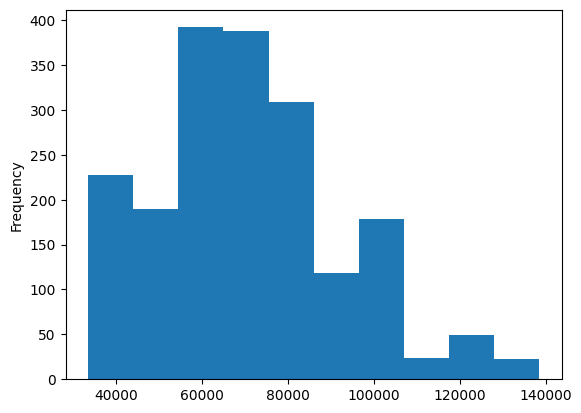

In [40]:
salary['Average_Salary'].plot(kind= 'hist')

### 2. Technical Skills

##### 2a. Popular programming languages required in Data Analytics job posts

In [43]:
ps = skill_filter(list_jd, programming_skill)
ps.set_index('skill', inplace = True)

(0.0, 1400.0)

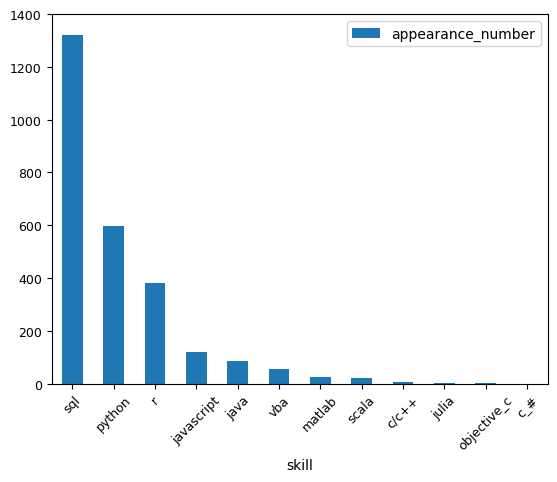

In [67]:
ps.plot(kind = 'bar', rot = 45, fontsize = 9)
plt.ylim(0,1400)

##### 2b. Popular data analysis tools required in Data Analytics job posts

In [55]:
dt = skill_filter(list_jd, data_tool)
dt.set_index('skill', inplace = True)

(0.0, 1400.0)

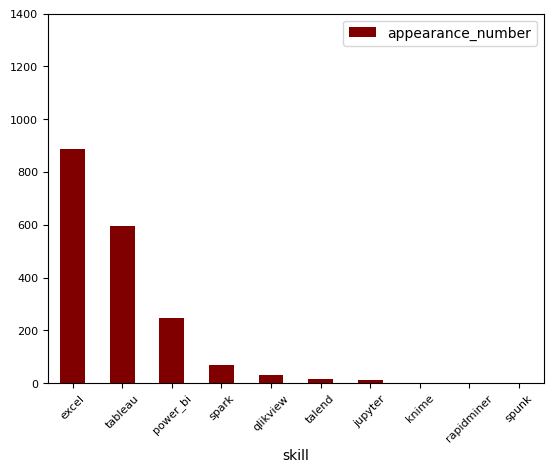

In [68]:
dt.plot(kind = 'bar', rot = 45, fontsize = 8, color = 'maroon')
plt.ylim(0,1400)

### 3. Attractive Sectors

##### 3a. Sectors of companies with above average offered salary

In [70]:
sy1 = salary.loc[salary['Average_Salary'] >= (salary['Average_Salary'].sum()/salary.shape[0])]
sy2 = sy1.groupby(['Sector'])['Sector'].count()

(0.0, 300.0)

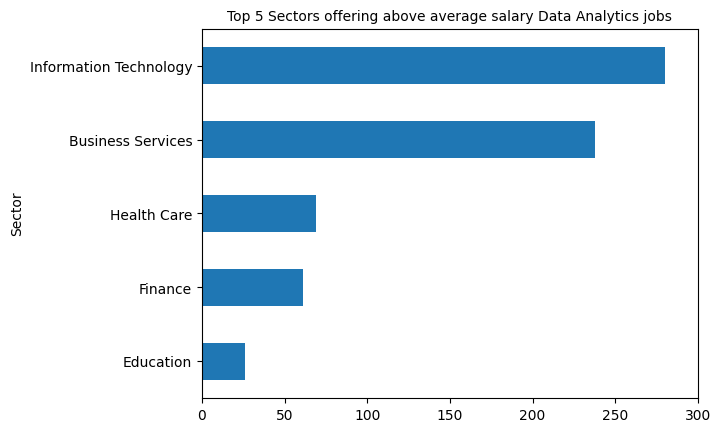

In [71]:
sy2.sort_values().tail(5).plot(kind='barh')
plt.title('Top 5 Sectors offering above average salary Data Analytics jobs', fontsize =10)
plt.xlim(0,300)


##### 3b. Sectors of companies with 5/5 company rating

In [72]:
top = df[['Rating','Company Name','Location','Headquarters','Size','Founded','Type of ownership','Industry','Sector','Revenue']].dropna()
top = top.loc[top['Rating']== 5]
top_r = top.groupby('Sector', axis = 0)['Company Name'].count()

Text(0.5, 1.0, 'Highly rated Companies by Sectors (Rating 5/5)')

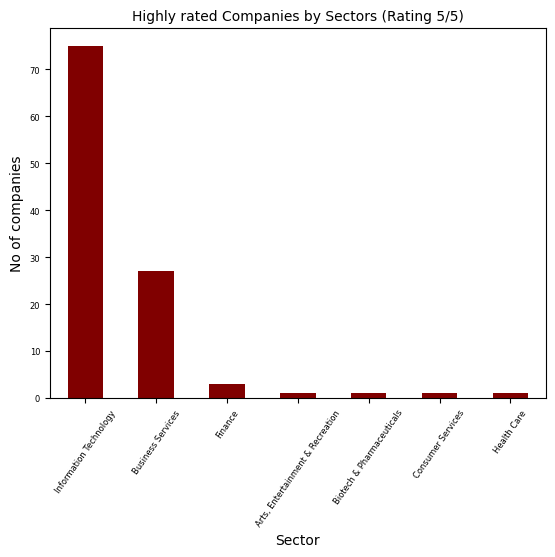

In [92]:
top_r.sort_values(ascending = False).plot(kind='bar', ylabel='No of companies', rot = 55, fontsize = 6 , color = 'maroon')
plt.title('Highly rated Companies by Sectors (Rating 5/5)', fontsize =10)

### 4. Job Locations

In [94]:
location = df.groupby('State')['Company Name'].count()

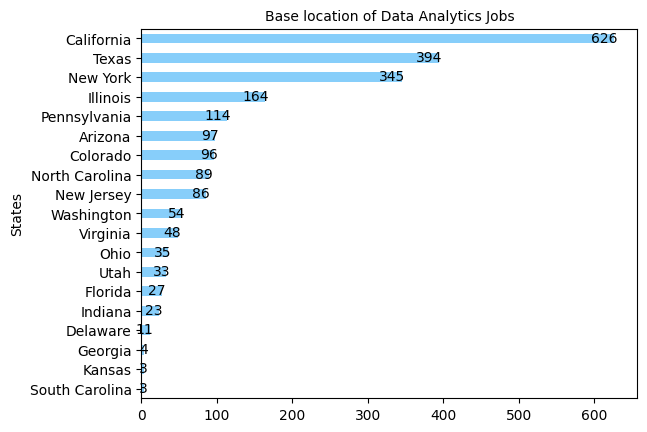

In [97]:
ln = location.sort_values().plot(kind='barh', color = 'lightskyblue')
plt.title('Base location of Data Analytics Jobs', fontsize =10)
plt.ylabel('States', fontsize=10)

for p in ln.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='right', va='center')